### Hypothesis testing
Elements of Data Science

## Hypothesis Testing Learning Goals
Develop and test an hypothesis
- Hypothesis
    - testable hypothesis
    - statistic
- Simulation: Sample the distribution
    - Repeat and collect outcomes
    - Iteration: 
        `for i in np.arange(samples)`
- Examine resulting distribution of outcomes
    - Probability distribution
    - Uncertainty
- p-test

In [3]:
import numpy as np
from datascience import *

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
# Fix for datascience plots
import collections as collections
import collections.abc as abc
collections.Iterable = abc.Iterable

## Hypothesis Testing

#### Ground Hog


In [5]:
groundhogdata = Table.read_table('Groundhogdata/summarizedGroundhogData_20210326.csv')
groundhogdata

hogID,year,shadowPres,dateSample,julDay,GDD,cGDD,numObs,meanJulSpringDay,sdJulSpringDay,seJulSpringDay,earlyOrLate
BC,2018,yes,2018-04-11,101,3.05556,127.222,30,85.8667,12.4367,2.27062,late
BC,2019,no,2019-04-06,96,8.33333,123.889,30,85.8667,12.4367,2.27062,late
BECK,2006,yes,2006-02-15,46,7.22222,127.006,30,72.4333,14.6586,2.67628,early
BECK,2007,no,2007-03-14,73,14.1667,129.167,30,72.4333,14.6586,2.67628,late
BECK,2008,no,2008-03-17,77,0.833333,128.611,30,72.4333,14.6586,2.67628,late
BECK,2009,yes,2009-03-10,69,12.2222,130,30,72.4333,14.6586,2.67628,early
BECK,2010,no,2010-03-21,80,7.22222,129.444,30,72.4333,14.6586,2.67628,late
BECK,2011,no,2011-03-20,79,7.77778,133.611,30,72.4333,14.6586,2.67628,late
BECK,2012,no,2012-03-07,67,13.3333,129.444,30,72.4333,14.6586,2.67628,early
BECK,2013,no,2013-03-30,89,3.88889,128.611,30,72.4333,14.6586,2.67628,late


In [6]:
yes_late = groundhogdata.where('shadowPres', 'yes').where('earlyOrLate', 'late')
no_early = groundhogdata.where('shadowPres', 'no').where('earlyOrLate', 'early')

correct_tbl = yes_late.append(no_early)

In [7]:
num_correct = correct_tbl.num_rows / groundhogdata.num_rows * 100
num_correct


51.132075471698116

In [8]:
shadow_options = make_array('yes', 'no')
spring_options = make_array('late', 'early')
num_observations = groundhogdata.num_rows

In [9]:
right = 0 
wrong = 0

for obs in range(num_observations):
    shadow = np.random.choice(shadow_options)
    spring = np.random.choice(spring_options)
    
    if shadow == 'yes' and spring == 'late':
        right += 1
    elif shadow == 'no' and spring == 'early':
        right += 1
    else:
        wrong += 1

simulated_num_correct = right / num_observations
simulated_num_correct

0.539622641509434

In [10]:
def sim_ground(repeats):
    correct_obs = []
    for i in np.arange(repeats):
        right = 0 
        wrong = 0
        for obs in range(num_observations):
            shadow = np.random.choice(shadow_options)
            spring = np.random.choice(spring_options)
            if shadow == 'yes' and spring == 'late':
                right += 1
            elif shadow == 'no' and spring == 'early':
                right += 1
            else:
                wrong += 1
        simulated_num_correct = right / num_observations
        correct_obs.append(simulated_num_correct)
    return correct_obs        

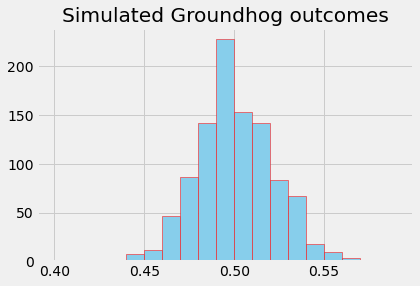

In [20]:
plt.hist(sim_ground(1000),bins=np.arange(0.4,0.6,.01),color = "skyblue", ec="red")
plt.title('Simulated Groundhog outcomes')
plt.savefig('sim_ground.png')
plt.show()

In [19]:
hogsimdata = Table().with_columns("Correct",sim_ground(1500))
hogsimdata

Correct
0.526415
0.511321
0.49434
0.501887
0.509434
0.528302
0.498113
0.516981
0.483019
0.479245


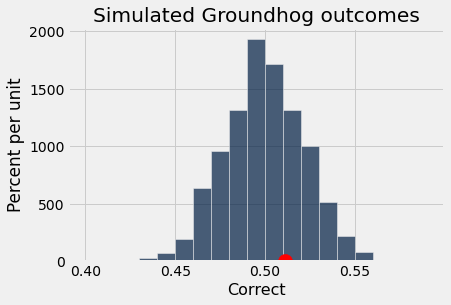

In [30]:
hogsimdata.hist(0,bins=np.arange(0.4,0.6,.01))
plt.scatter(num_correct/100, 0, color='red', s=200);
plt.title('Simulated Groundhog outcomes')
plt.savefig('sim_ground_correct.png')
plt.show()

In [31]:
np.count_nonzero(hogsimdata.column('Correct') >= num_correct/100) / 1500

0.314

#### Essex Ed

In [13]:
groundhogdata.where('hogID',"EE")

hogID,year,shadowPres,dateSample,julDay,GDD,cGDD,numObs,meanJulSpringDay,sdJulSpringDay,seJulSpringDay,earlyOrLate
EE,2011,yes,2011-03-05,64,11.9444,135.556,30,50.8333,15.7329,2.87241,late
EE,2012,no,2012-02-01,32,12.7778,131.111,30,50.8333,15.7329,2.87241,early
EE,2013,no,2013-02-15,46,6.94444,129.167,30,50.8333,15.7329,2.87241,early
EE,2014,yes,2014-03-15,74,10.8333,133.611,30,50.8333,15.7329,2.87241,late
EE,2015,yes,2015-03-27,86,6.38889,130.278,30,50.8333,15.7329,2.87241,late
EE,2016,yes,2016-02-21,52,8.33333,131.667,30,50.8333,15.7329,2.87241,late
EE,2017,yes,2017-02-01,32,3.88889,129.722,30,50.8333,15.7329,2.87241,early
EE,2018,no,2018-02-16,47,8.61111,134.167,30,50.8333,15.7329,2.87241,early
EE,2019,no,2019-02-22,53,4.72222,131.667,30,50.8333,15.7329,2.87241,late


In [15]:
correct_tbl.where('hogID',"EE")

hogID,year,shadowPres,dateSample,julDay,GDD,cGDD,numObs,meanJulSpringDay,sdJulSpringDay,seJulSpringDay,earlyOrLate
EE,2011,yes,2011-03-05,64,11.9444,135.556,30,50.8333,15.7329,2.87241,late
EE,2014,yes,2014-03-15,74,10.8333,133.611,30,50.8333,15.7329,2.87241,late
EE,2015,yes,2015-03-27,86,6.38889,130.278,30,50.8333,15.7329,2.87241,late
EE,2016,yes,2016-02-21,52,8.33333,131.667,30,50.8333,15.7329,2.87241,late
EE,2012,no,2012-02-01,32,12.7778,131.111,30,50.8333,15.7329,2.87241,early
EE,2013,no,2013-02-15,46,6.94444,129.167,30,50.8333,15.7329,2.87241,early
EE,2018,no,2018-02-16,47,8.61111,134.167,30,50.8333,15.7329,2.87241,early


In [17]:
num_correct = correct_tbl.where('hogID',"EE").num_rows / groundhogdata.where('hogID',"EE").num_rows * 100
num_correct

77.77777777777779

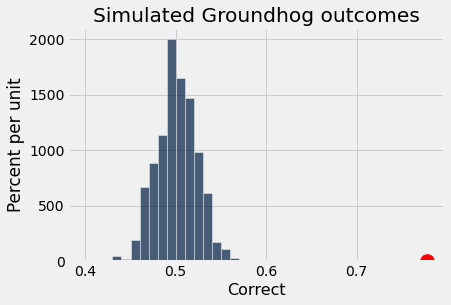

In [20]:
hogsimdata.hist(0,bins=np.arange(0.4,0.6,.01))
plt.scatter(num_correct/100, 0, color='red', s=200);
plt.title('Simulated Groundhog outcomes')
plt.savefig('sim_ground_correct.png')
plt.show()

In [21]:
np.count_nonzero(hogsimdata.column('Correct') >= num_correct/100) / 1500

0.0